In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [14]:
data = pd.read_csv("C:\\Users\\User\\OneDrive - vit.ac.in\\Documents\\ml\\Training.csv")

In [15]:
data.shape


(4920, 101)

In [16]:
data.head()

itching  skin_rash  continuous_sneezing  shivering  chills  joint_pain  \
0        1          1                    0          0       0           0   
1        0          1                    0          0       0           0   
2        1          0                    0          0       0           0   
3        1          1                    0          0       0           0   
4        1          1                    0          0       0           0   

   stomach_pain  acidity  muscle_wasting  vomiting  ...  rusty_sputum  \
0             0        0               0         0  ...             0   
1             0        0               0         0  ...             0   
2             0        0               0         0  ...             0   
3             0        0               0         0  ...             0   
4             0        0               0         0  ...             0   

   receiving_blood_transfusion  receiving_unsterile_injections  coma  \
0                            0                               0     0   
1                            0                               0     0   
2                            0                               0     0   
3                            0                               0     0   
4                            0                               0     0   

   stomach_bleeding  distention_of_abdomen  blood_in_sputum  palpitations  \
0                 0                      0                0             0   
1                 0                      0                0             0   
2                 0                      0                0             0   
3                 0                      0                0             0   
4                 0                      0                0             0   

   painful_walking         prognosis  
0                0  Fungal infection  
1                0  Fungal infection  
2                0  Fungal infection  
3                0  Fungal infection  
4                0  Fungal infection  

[5 rows x 101 columns]

In [17]:
data.isnull().sum()

itching                  0
skin_rash                0
continuous_sneezing      0
shivering                0
chills                   0
                        ..
distention_of_abdomen    0
blood_in_sputum          0
palpitations             0
painful_walking          0
prognosis                0
Length: 101, dtype: int64

In [18]:
#Split the dataset into x and y
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [19]:
#Split the X and Y dataset into training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [20]:
# check the shape of X_train and X_test
x_train.shape, x_test.shape

((3690, 100), (1230, 100))

In [21]:
data.dtypes

itching                   int64
skin_rash                 int64
continuous_sneezing       int64
shivering                 int64
chills                    int64
                          ...  
distention_of_abdomen     int64
blood_in_sputum           int64
palpitations              int64
painful_walking           int64
prognosis                object
Length: 101, dtype: object

In [22]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scalar = scalar.fit(x_train)
x_train = scalar.transform(x_train)
x_test = scalar.transform(x_test)

In [33]:
criterion = ['entropy', 'gini']
splitter = ['best', 'random']
max_features = [10, 20, 50, 75, 100]
max_depth = [10, 20, 50]
for x in criterion:
    for y in splitter:
        for z in max_features:
            for a in max_depth:
                clf_dec = DecisionTreeClassifier(criterion=x, splitter = y, max_features = z, max_depth = a)
                clf_dec.fit(x_train, y_train)
                y_pred_dec = clf_dec.predict(x_test)
                print("The criterion and splitter used here are:", x, y)
                print("Maximum features are ",z)
                print("Maximum depth is", a)
                print ("Accuracy score : ",accuracy_score(y_test,y_pred_dec))


The criterion and splitter used here are: entropy best
Maximum features are  10
Maximum depth is 10
Accuracy score :  0.8138211382113821
The criterion and splitter used here are: entropy best
Maximum features are  10
Maximum depth is 20
Accuracy score :  0.9764227642276423
The criterion and splitter used here are: entropy best
Maximum features are  10
Maximum depth is 50
Accuracy score :  0.991869918699187
The criterion and splitter used here are: entropy best
Maximum features are  20
Maximum depth is 10
Accuracy score :  0.8284552845528456
The criterion and splitter used here are: entropy best
Maximum features are  20
Maximum depth is 20
Accuracy score :  0.9796747967479674
The criterion and splitter used here are: entropy best
Maximum features are  20
Maximum depth is 50
Accuracy score :  0.991869918699187
The criterion and splitter used here are: entropy best
Maximum features are  50
Maximum depth is 10
Accuracy score :  0.9463414634146341
The criterion and splitter used here are: e

[Text(324.615969581749, 214.91162790697675, 'X[68] <= 3.26\ngini = 0.976\nsamples = 3690\nvalue = [99, 93, 86, 89, 92, 92, 86, 87, 95, 94, 82, 98\n92, 87, 87, 93, 87, 87, 77, 97, 91, 86, 89, 93\n93, 101, 91, 86, 88, 92, 86, 90, 84, 92, 93, 94\n92, 84, 92, 86, 87]'),
 Text(319.52395437262356, 209.85488372093022, 'X[31] <= 3.857\ngini = 0.975\nsamples = 3589\nvalue = [99, 93, 86, 89, 92, 92, 86, 87, 95, 94, 82, 98\n92, 87, 87, 93, 87, 87, 77, 97, 91, 86, 89, 93\n93, 0, 91, 86, 88, 92, 86, 90, 84, 92, 93, 94\n92, 84, 92, 86, 87]'),
 Text(314.4319391634981, 204.79813953488372, 'X[93] <= 0.815\ngini = 0.974\nsamples = 3491\nvalue = [99, 93, 86, 89, 92, 92, 86, 87, 95, 94, 82, 0\n92, 87, 87, 93, 87, 87, 77, 97, 91, 86, 89, 93\n93, 0, 91, 86, 88, 92, 86, 90, 84, 92, 93, 94\n92, 84, 92, 86, 87]'),
 Text(309.33992395437264, 199.74139534883722, 'X[84] <= 0.554\ngini = 0.974\nsamples = 3394\nvalue = [99, 93, 86, 89, 92, 92, 86, 87, 95, 94, 82, 0\n92, 87, 87, 93, 87, 87, 77, 0, 91, 86, 89, 93\n93,

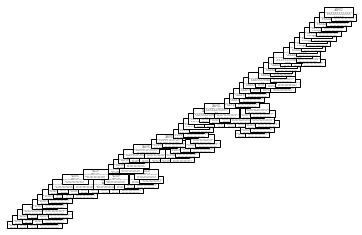

In [34]:
from sklearn import tree
tree.plot_tree(clf_dec.fit(x_train, y_train)) 